In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Loading the data

data = pd.read_csv('covid19.csv', index_col = 0)
data.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Sno,,,,,,
1,30/01/20,Kerala,1,0,0,0
2,31/01/20,Kerala,1,0,0,0
3,01/02/20,Kerala,2,0,0,0
4,02/02/20,Kerala,3,0,0,0
5,03/02/20,Kerala,3,0,0,0


In [3]:
# Grouping the data by date variable

df = data.groupby(['Date'], sort = False).sum()
df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


In [4]:
# Calculating the Total Cases

df['Total_cases'] = df.sum(axis = 1).astype('int')
df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3


In [5]:
df.tail()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
17/03/20,113,24,14,3,154
18/03/20,126,25,14,3,168
19/03/20,148,25,20,4,197
20/03/20,191,32,23,4,250
21/03/20,244,39,23,4,310


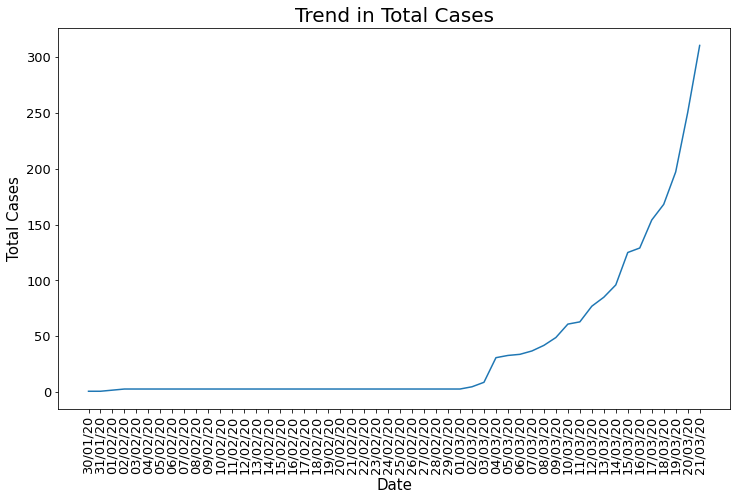

In [6]:
# Ploting the Total Cases

plt.figure(figsize = (10,6))
plt.plot(df['Total_cases'])
plt.xlabel('Date', fontsize = 15)
plt.tick_params(axis='x', which='major', labelsize = 3)
plt.tight_layout()

plt.ylabel('Total Cases', fontsize = 15)

plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)

plt.title('Trend in Total Cases',fontsize = 20)
plt.show()

In [7]:
# Total cases on 4th March 2020

df.loc['04/03/20','Total_cases']

31

In [8]:
# Subsetting the Data from 4th March 2020 to 21st March 2020

df1 = df.loc['04/03/20':]
df1.shape

(18, 5)

In [9]:
df1.head(18)

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
04/03/20,12,16,3,0,31
05/03/20,14,16,3,0,33
06/03/20,15,16,3,0,34
07/03/20,18,16,3,0,37
08/03/20,23,16,3,0,42
09/03/20,30,16,3,0,49
10/03/20,42,16,3,0,61
11/03/20,44,16,3,0,63
12/03/20,57,17,3,0,77


In [10]:
# Calcluating the Rate of Interest on each day
# Formula
# (Total Cases on Next Day - Total Cases on Current Day)/Total Cases on Current Day

ra = []
sum = 0
for i in range(df1.shape[0]-1):
    a = round((df1.iloc[i+1]['Total_cases'] - df1.iloc[i]['Total_cases'])/df1.iloc[i]['Total_cases'],4)
    ra.append(a)
len(ra)

17

In [11]:
# Computing the Average Rate of Increase

rate = round(np.average(ra),4)
rate

0.1481

# Predicted Forecast

## Formula
### P_t = P_o * (e ^ (rate * t))

### P_t -> Predicted Forecast 
### P_o -> Initial Value
### rate -> Average Rate of Interest 
### t -> Time Period in days

In [12]:
P_o = 31
t = 26
P_t = round(P_o * (math.exp(rate * t)))
P_t

1458